# importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset 

In [2]:
movie=pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/refs/heads/master/MoviesOnStreamingPlatforms_updated.csv')




# understanding the dataset

In [3]:
movie.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16130 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

# Data cleaning

In [5]:
movie=movie.drop(columns=['Unnamed: 0']) # removing the unnecessary columns

In [6]:
movie['Age']=movie['Age'].fillna(movie['Age'].mode()[0])
movie['IMDb']=movie['IMDb'].fillna(movie['IMDb'].mean()).round(1)

movie['Rotten Tomatoes']=movie['Rotten Tomatoes'].str.strip('%')
movie['Rotten Tomatoes']=movie['Rotten Tomatoes'].astype(float)
movie['Rotten Tomatoes']=(movie['Rotten Tomatoes'].fillna(movie['Rotten Tomatoes'].mean())/10).round(1)

In [7]:
movie['Directors']=movie['Directors'].fillna('unknown')
movie['Genres']=movie['Genres'].fillna('unknown')
movie['Country']=movie['Country'].fillna('unknown')
movie['Language']=movie['Language'].fillna('unknown')
movie['Runtime']=movie['Runtime'].fillna(movie['Runtime'].mean())

In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              16744 non-null  object 
 4   IMDb             16744 non-null  float64
 5   Rotten Tomatoes  16744 non-null  float64
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16744 non-null  object 
 12  Genres           16744 non-null  object 
 13  Country          16744 non-null  object 
 14  Language         16744 non-null  object 
 15  Runtime          16744 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 2.0+ MB


In [9]:
movie.head(2)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


In [10]:
x=movie['Genres'].str.split(',')
Genres=x.explode()

Genres_df=pd.merge(movie[['Title','IMDb','Netflix','Runtime']],Genres,left_index=True,right_index=True)
Genres_df.head()

,Title,IMDb,Netflix,Runtime,Genres
0,Inception,8.8,1,148.0,Action
0,Inception,8.8,1,148.0,Adventure
0,Inception,8.8,1,148.0,Sci-Fi
0,Inception,8.8,1,148.0,Thriller
1,The Matrix,8.7,1,136.0,Action


In [11]:
z = movie.columns[[6,7,8,9]]

movie[z].sum(1)

0        1
1        1
2        1
3        1
4        2
        ..
16739    1
16740    1
16741    1
16742    1
16743    1
Length: 16744, dtype: int64

In [12]:
# Splitting 'Language' column where multiple languages are separated by commas
language_split = movie['Language'].str.split(',')
Languages = language_split.explode()

# Creating a DataFrame with Title, IMDb, and Language
Languages_df = pd.merge(movie[['Title', 'IMDb']], Languages, left_index=True, right_index=True)
Languages_df.head()


,Title,IMDb,Language
0,Inception,8.8,English
0,Inception,8.8,Japanese
0,Inception,8.8,French
1,The Matrix,8.7,English
2,Avengers: Infinity War,8.5,English


In [13]:
# Melting the dataset to transform platform columns into rows
Platforms_df = movie.melt(id_vars=['Title', 'IMDb','Rotten Tomatoes','Genres','Runtime'], 
                          value_vars=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], 
                          var_name='Platform', 
                          value_name='Available')

# Filtering out movies that are NOT available (Available == 0)
Platforms_df = Platforms_df[Platforms_df['Available'] == 1].drop(columns=['Available'])

Platforms_df.head()


,Title,IMDb,Rotten Tomatoes,Genres,Runtime,Platform
0,Inception,8.8,8.7,"Action,Adventure,Sci-Fi,Thriller",148.0,Netflix
1,The Matrix,8.7,8.7,"Action,Sci-Fi",136.0,Netflix
2,Avengers: Infinity War,8.5,8.4,"Action,Adventure,Sci-Fi",149.0,Netflix
3,Back to the Future,8.5,9.6,"Adventure,Comedy,Sci-Fi",116.0,Netflix
4,"The Good, the Bad and the Ugly",8.8,9.7,Western,161.0,Netflix


In [14]:
# Splitting 'Directors' column
directors_split = movie['Directors'].str.split(',')
Directors = directors_split.explode()

# Creating Directors_df
Directors_df = pd.merge(movie[['Title', 'IMDb']], Directors, left_index=True, right_index=True)
Directors_df.head()

,Title,IMDb,Directors
0,Inception,8.8,Christopher Nolan
1,The Matrix,8.7,Lana Wachowski
1,The Matrix,8.7,Lilly Wachowski
2,Avengers: Infinity War,8.5,Anthony Russo
2,Avengers: Infinity War,8.5,Joe Russo


In [15]:
# Defining runtime categories
bins = [0, 60, 120, 180, 300]  # (in minutes)
labels = ['Short (<60 min)', 'Medium (60-120 min)', 'Long (120-180 min)', 'Very Long (>180 min)']
movie['Runtime Category'] = pd.cut(movie['Runtime'], bins=bins, labels=labels, right=False)


In [16]:
movie

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Runtime Category
0,1,Inception,2010,13+,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.000000,Long (120-180 min)
1,2,The Matrix,1999,18+,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.000000,Long (120-180 min)
2,3,Avengers: Infinity War,2018,13+,8.5,8.4,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.000000,Long (120-180 min)
3,4,Back to the Future,1985,7+,8.5,9.6,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.000000,Medium (60-120 min)
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,9.7,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.000000,Long (120-180 min)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,18+,6.2,6.5,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.000000,Long (120-180 min)
16740,16741,The Poof Point,2001,7+,4.7,6.5,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.000000,Medium (60-120 min)
16741,16742,Sharks of Lost Island,2013,18+,5.7,6.5,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,93.413447,Medium (60-120 min)
16742,16743,Man Among Cheetahs,2017,18+,6.6,6.5,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,93.413447,Medium (60-120 min)


# DATA ANALYSIS

# How many unique movies are in the dataset?
# What is the average IMDb rating of all movies?
# How many movies were released each year?
# What is the most common genre in the dataset?
# What is the most common language for movies?

# How many movies are available on each streaming platform?
# Which platform has the highest average IMDb rating?
# Are there any movies available on all four platforms (Netflix, Hulu, Prime Video, Disney+)?
# Which platform has the most movies with an IMDb rating above 8.0?
# Which platform has the most movies released after 2015?

# What are the top 5 genres with the most movies?
# Which genre has the highest average IMDb rating?
# What is the most popular genre on Netflix?
# How many movies in the Comedy genre have an IMDb rating above 7.5?
# What is the average IMDb rating for Horror movies?

# Who are the top 5 directors with the most movies in the dataset?
# Which director has the highest average IMDb rating?
# Which director has made the most Action movies?
# What is the average IMDb rating of movies directed by Christopher Nolan?
# How many movies by Steven Spielberg are available on Prime Video?

# What are the top 5 most common languages in the dataset?
# What is the average IMDb rating of French movies?
# How many movies are from the United States?
# Which country has produced the most Drama movies?
# What is the most common language for movies on Hulu?
# IMDb and Rotten Tomatoes Score Analysis
# What is the highest IMDb rating in the dataset, and which movie has it?
# What is the lowest Rotten Tomatoes score, and which movie has it?
# What is the correlation between IMDb ratings and Rotten Tomatoes scores?
# How many movies have both IMDb rating above 8.0 and Rotten Tomatoes score above 90%?
# Which platform has the highest average Rotten Tomatoes score?

# What is the average runtime of all movies?
# Which movie has the longest runtime?
# Which genre tends to have the longest runtime on average?
# How many movies have a runtime of less than 60 minutes?
# What is the average IMDb rating for movies with a runtime above 150 minutes?

In [17]:
movie

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Runtime Category
0,1,Inception,2010,13+,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.000000,Long (120-180 min)
1,2,The Matrix,1999,18+,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.000000,Long (120-180 min)
2,3,Avengers: Infinity War,2018,13+,8.5,8.4,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.000000,Long (120-180 min)
3,4,Back to the Future,1985,7+,8.5,9.6,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.000000,Medium (60-120 min)
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,9.7,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.000000,Long (120-180 min)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,18+,6.2,6.5,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.000000,Long (120-180 min)
16740,16741,The Poof Point,2001,7+,4.7,6.5,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.000000,Medium (60-120 min)
16741,16742,Sharks of Lost Island,2013,18+,5.7,6.5,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,93.413447,Medium (60-120 min)
16742,16743,Man Among Cheetahs,2017,18+,6.6,6.5,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,93.413447,Medium (60-120 min)


In [18]:
m=movie['Title'].unique()
m.shape[0]

#or

m=movie['Title'].nunique()
m


16744

In [19]:
# What is the average IMDb rating of all movies?
movie['IMDb'].mean()

np.float64(5.902657668418538)

In [20]:

gp=movie.groupby(['Year'])
gp['Title'].count()


Year
1902       1
1912       1
1913       2
1915       4
1916       1
        ... 
2016    1206
2017    1401
2018    1285
2019     689
2020     147
Name: Title, Length: 109, dtype: int64

In [21]:

# What is the most common genre in the dataset?
# gp=movie.groupby(['Genres'])
# gp['Genres'].count().idxmax()


x=movie['Genres'].str.split(',')

#The .explode() function transforms lists into separate rows.
Genres=x.explode()


Genres_df=pd.merge(movie[['Title']],Genres,left_index=True,right_index=True)
Genres_df.head()

Genres_df['Genres'].mode()


0    Drama
Name: Genres, dtype: object

In [22]:
# What is the most common language for movies?
gp=movie.groupby(['Language'])
gp['Language'].count().idxmax()

'English'

In [23]:
# How many movies are available on each streaming platform?
platforms = ['Netflix', 'Hulu', 'Disney+', 'Prime Video']

#1 indicates that the movie is available on that platform.
#0 means it is not available.

#The sum() function calculates the total count of movies available on each platform .
movie_counts = movie[platforms].sum()

movie_counts

#Index = Streaming platform name.
#Values = Total number of movies available on that platform.


Netflix         3560
Hulu             903
Disney+          564
Prime Video    12354
dtype: int64

In [24]:
# Which platform has the highest average IMDb rating?

Platforms_df

gp=Platforms_df.groupby('Platform')
gp['IMDb'].mean().idxmax()




'Disney+'

In [25]:
# Are there any movies available on all four platforms (Netflix, Hulu, Prime Video, Disney+)?
platforms = (movie['Netflix']==1) & (movie['Hulu']==1) & (movie['Prime Video']==1) & (movie['Disney+']==1)
platforms = movie[(movie['Netflix']==1) & (movie['Hulu']==1) & (movie['Prime Video']==1) & (movie['Disney+']==1)]
platforms.shape[0]

#or

platforms = movie[movie[['Netflix','Hulu','Prime Video','Disney+']].sum(axis=1)==4]
platforms.shape[0]


0

In [26]:
# Which platform has the most movies with an IMDb rating above 8.0?
Platforms_df

cond = Platforms_df['IMDb']>8.0

Platforms_df.loc[cond,['Platform']].mode()

,Platform
0,Prime Video


In [27]:
# Which platform has the most movies released after 2015?

# Assuming the release year column is named 'Year'
df_post_2015 = movie[movie['Year'] > 2015]
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
platform_counts = df_post_2015[platforms].sum()
platform_counts.idxmax()

'Prime Video'

In [28]:
z = movie.columns[[6,7,8,9]]
movie[z].sum(1)



0        1
1        1
2        1
3        1
4        2
        ..
16739    1
16740    1
16741    1
16742    1
16743    1
Length: 16744, dtype: int64

In [29]:
Genres_df

,Title,Genres
0,Inception,Action
0,Inception,Adventure
0,Inception,Sci-Fi
0,Inception,Thriller
1,The Matrix,Action
...,...,...
16741,Sharks of Lost Island,Documentary
16742,Man Among Cheetahs,Documentary
16743,In Beaver Valley,Documentary
16743,In Beaver Valley,Short


In [30]:
# What are the top 5 genres with the most movies?

# top= movie['Genres'].dropna().str.split(',').explode()
# top.value_counts().head()

# ( groupby + count() ) = value_count()

Genres_df['Genres'].value_counts().head()


Genres
Drama          7227
Comedy         4637
Thriller       3354
Action         2683
Documentary    2546
Name: count, dtype: int64

In [31]:
# Which genre has the highest average IMDb rating?

Genres_df

# gp = Genres_df.groupby('Genres')
# gp['IMDb'].mean().idxmax()   


,Title,Genres
0,Inception,Action
0,Inception,Adventure
0,Inception,Sci-Fi
0,Inception,Thriller
1,The Matrix,Action
...,...,...
16741,Sharks of Lost Island,Documentary
16742,Man Among Cheetahs,Documentary
16743,In Beaver Valley,Documentary
16743,In Beaver Valley,Short


In [32]:
# What is the most popular genre on Netflix?

dd=pd.merge(Platforms_df,Genres_df)

dd

netflix_movies =dd[dd['Platform'] == 'Netflix']

most_popular_genre = netflix_movies['Genres'].value_counts().idxmax()

most_popular_genre


'Comedy'

In [33]:
# How many movies in the Comedy genre have an IMDb rating above 7.5?

comedy_movies = movie[movie['Genres'].str.contains('Comedy')]

high_rated_comedy = comedy_movies[comedy_movies['IMDb'] > 7.5]

high_rated_comedy.shape[0]    



316

In [34]:
# What is the average IMDb rating for Horror movies?

horror_movies = movie[movie['Genres'].str.contains('Horror', na=False, case=False)]

avg_imdb_horror = horror_movies['IMDb'].mean()

avg_imdb_horror



np.float64(4.730713312130849)

# Who are the top 5 directors with the most movies in the dataset?

In [35]:

Directors_df

# top_directors = Directors_df.groupby(['Directors'])
# top_directors['Directors'].count()


top_directors = movie['Directors'].value_counts().head(5)
top_directors



Directors
unknown         726
Jay Chapman      36
Joseph Kane      30
Cheh Chang       26
Sam Newfield     22
Name: count, dtype: int64

# Which director has the highest average IMDb rating?

In [36]:

df= Directors_df.groupby(['Directors'])
df['IMDb'].mean().idxmax()

'Danny Wu'

# Which director has made the most Action movies?

In [37]:
df = movie[movie['Genres'].str.contains('Action')]


# What are the top 5 most common languages in the dataset?

In [38]:
Languages_df
top_languages = Languages_df['Language'].value_counts().head(5)
top_languages

Language
English    13233
Spanish      872
French       799
Hindi        731
unknown      614
Name: count, dtype: int64

# What is the average IMDb rating of French movies?

In [39]:
Languages_df
avg_imdb_french = Languages_df[Languages_df['Language'] == 'French']['IMDb'].mean()
avg_imdb_french

np.float64(6.36145181476846)

# How many movies are from the United States?

In [40]:
Country_split = movie['Country'].str.split(',')
country_cf=Country_split.explode()
country_cf

Country_df = pd.merge(movie[['Title', 'IMDb']],country_cf, left_index=True, right_index=True)
Country_df.head()


us_movies_count = Country_df[Country_df['Country'] == 'United States'].shape[0]
us_movies_count

10486

# Which country has produced the most Drama movies?


In [41]:
Genres_df
most_drama_country = Genres_df[Genres_df['Genres'].str.contains("Drama", na=False)]
most_drama_country['Title'].value_counts().idxmax()

'The Bears and I'

# What is the most common language for movies on Hulu?


In [42]:
AB= pd.merge(Platforms_df,Languages_df)
AB

hulu_common_language = AB[AB['Platform'] == 'Hulu']['Language'].value_counts().idxmax()
hulu_common_language

'English'

# IMDb and Rotten Tomatoes Score Analysis

# What is the highest IMDb rating in the dataset, and which movie has it?


In [43]:
AB

highest_imdb_movie = AB.loc[AB['IMDb'].idxmax(), ['Title', 'IMDb']]
highest_imdb_movie

Title    My Next Guest with David Letterman and Shah Ru...
IMDb                                                   9.3
Name: 1971, dtype: object

# What is the lowest Rotten Tomatoes score, and which movie has it?


In [44]:
# Platforms=Platforms_df['Rotten Tomatoes'].str.strip('%')
# Platforms

# lowest_rt_movie = Platforms_df.loc[Platforms_df['Rotten Tomatoes'].idxmin(), ['Title', 'Rotten_Tomatoes']]

# What is the correlation between IMDb ratings and Rotten Tomatoes scores?

In [45]:
Platforms_df

correlation = Platforms_df[['IMDb', 'Rotten Tomatoes']].corr().iloc[0,1]
correlation

np.float64(0.2658882141836595)

# How many movies have both IMDb rating above 8.0 and Rotten Tomatoes score above 90%?


In [46]:


high_rated_movies_count = Platforms_df[(Platforms_df['IMDb'] > 8.0) & (df['Rotten Tomatoes'] > 90)].shape[0]

movie

C:\Users\deepa\AppData\Local\Temp\ipykernel_20904\2670243952.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_rated_movies_count = Platforms_df[(Platforms_df['IMDb'] > 8.0) & (df['Rotten Tomatoes'] > 90)].shape[0]


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Runtime Category
0,1,Inception,2010,13+,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.000000,Long (120-180 min)
1,2,The Matrix,1999,18+,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.000000,Long (120-180 min)
2,3,Avengers: Infinity War,2018,13+,8.5,8.4,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.000000,Long (120-180 min)
3,4,Back to the Future,1985,7+,8.5,9.6,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.000000,Medium (60-120 min)
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,9.7,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.000000,Long (120-180 min)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,18+,6.2,6.5,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.000000,Long (120-180 min)
16740,16741,The Poof Point,2001,7+,4.7,6.5,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.000000,Medium (60-120 min)
16741,16742,Sharks of Lost Island,2013,18+,5.7,6.5,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,93.413447,Medium (60-120 min)
16742,16743,Man Among Cheetahs,2017,18+,6.6,6.5,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,93.413447,Medium (60-120 min)


# Which platform has the highest average Rotten Tomatoes score?



In [47]:
best_platform_rt = Platforms_df.groupby('Platform')['Rotten Tomatoes'].mean().idxmax()
best_platform_rt

'Hulu'

# What is the average runtime of all movies?

In [48]:
average_runtime = movie['Runtime'].mean()
average_runtime

np.float64(93.4134472511144)

# Which movie has the longest runtime?


In [49]:
longest_runtime_movie = movie.loc[movie['Runtime'].idxmax(), ['Title', 'Runtime']]
longest_runtime_movie

Title      Colorado
Runtime      1256.0
Name: 13179, dtype: object

# Which genre tends to have the longest runtime on average?


In [50]:
# Genres_df

# longest_runtime_genre = Genres_df.groupby('Genres')['Runtime'].mean().idxmax()
# longest_runtime_genre

# How many movies have a runtime of less than 60 minutes?


In [51]:
short_movies_count = Genres_df[Genres_df['Runtime'] < 60].shape[0]
short_movies_count

KeyError: 'Runtime'

# What is the average IMDb rating for movies with a runtime above 150 minutes?

In [ ]:
# Genres_df
# long_runtime_avg_imdb = Genres_df[Genres_df['Runtime'] > 150]['IMDb'].mean()
# long_runtime_avg_imdb

movie

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Runtime Category
0,1,Inception,2010,13+,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.000000,Long (120-180 min)
1,2,The Matrix,1999,18+,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.000000,Long (120-180 min)
2,3,Avengers: Infinity War,2018,13+,8.5,8.4,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.000000,Long (120-180 min)
3,4,Back to the Future,1985,7+,8.5,9.6,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.000000,Medium (60-120 min)
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,9.7,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.000000,Long (120-180 min)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,18+,6.2,6.5,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.000000,Long (120-180 min)
16740,16741,The Poof Point,2001,7+,4.7,6.5,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.000000,Medium (60-120 min)
16741,16742,Sharks of Lost Island,2013,18+,5.7,6.5,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,93.413447,Medium (60-120 min)
16742,16743,Man Among Cheetahs,2017,18+,6.6,6.5,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,93.413447,Medium (60-120 min)


# ---------------------------------------------------------


# 1.number of movies released in each year


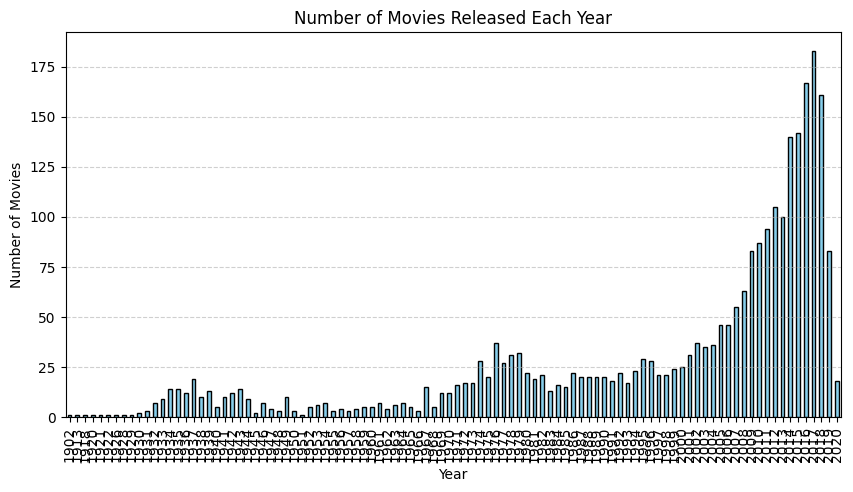

In [ ]:
# Count movies per year
movies_per_year = df['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
movies_per_year.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released Each Year")
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()




# 2.number of movies available on each platfort

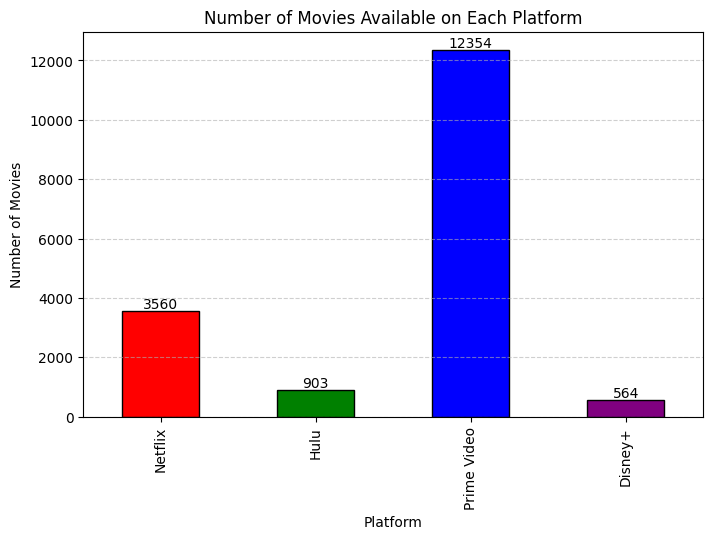

In [ ]:
df_platforms = movie[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()

plt.figure(figsize=(8,5))
a=df_platforms.plot(kind='bar', color=['red', 'green', 'blue', 'purple'], edgecolor='black')

plt.xlabel("Platform")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Available on Each Platform")
plt.grid(axis='y', linestyle='--', alpha=0.6)

a.bar_label(a.containers[0])
plt.show()



# 3.number of movies directed by top 10 directers

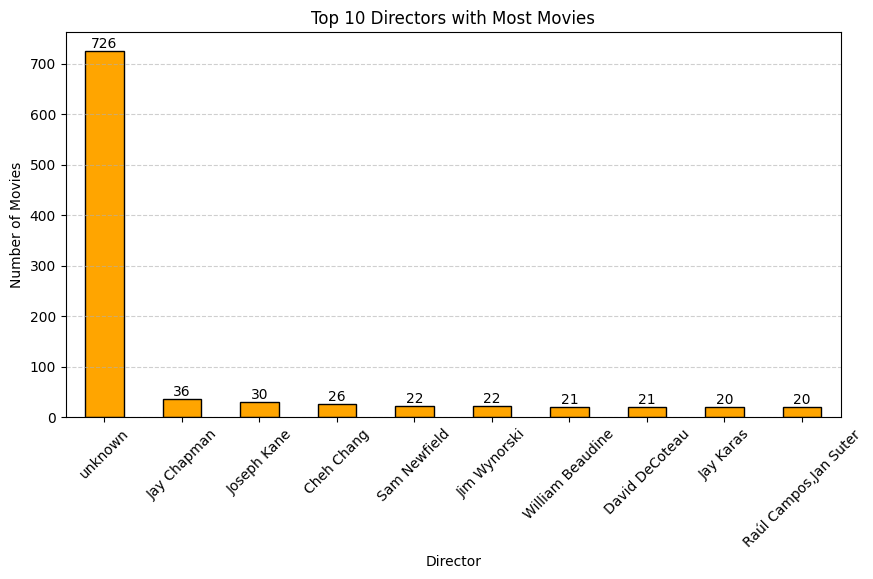

In [ ]:
top_directors = movie['Directors'].value_counts().head(10)

plt.figure(figsize=(10,5))
a=top_directors.plot(kind='bar', color='orange', edgecolor='black')

plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.title("Top 10 Directors with Most Movies")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

a.bar_label(a.containers[0])
plt.show()



4.get the pattern of imdb over the year

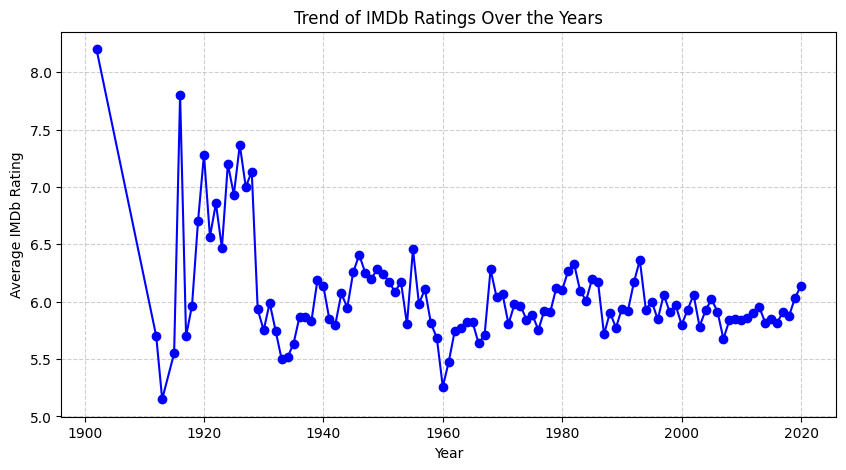

In [ ]:
df_year_rating = movie.groupby('Year')['IMDb'].mean()

plt.figure(figsize=(10,5))
df_year_rating.plot(kind='line', marker='o', color='blue')

plt.xlabel("Year")
plt.ylabel("Average IMDb Rating")
plt.title("Trend of IMDb Ratings Over the Years")
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


5.check the pattern of imdb rating over the recent  decate


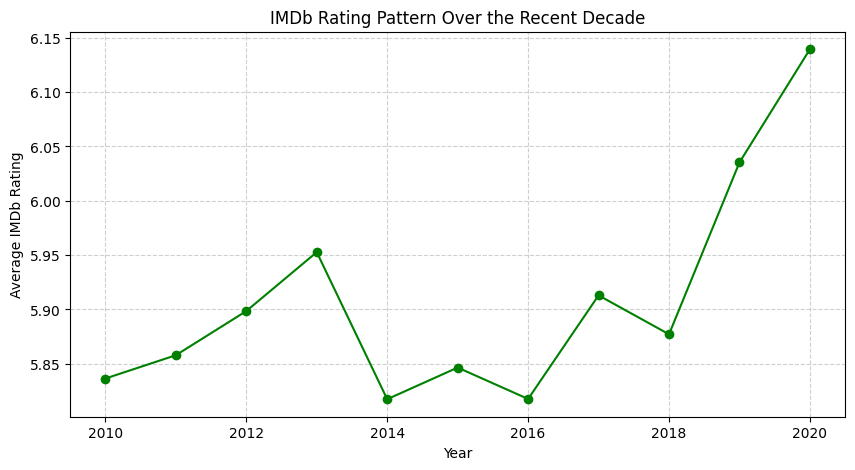

In [ ]:
recent_decade = movie[movie["Year"] >= 2010].groupby("Year")["IMDb"].mean()

plt.figure(figsize=(10,5))
recent_decade.plot(kind='line', marker='o', color='green')

plt.xlabel("Year")
plt.ylabel("Average IMDb Rating")
plt.title("IMDb Rating Pattern Over the Recent Decade")
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()



6.number of geners available in each platform

In [ ]:
df_genres = Platforms_df.groupby('Platform')['Genres'].nunique()

plt.figure(figsize=(8,5))
df_genres.plot(kind='bar', color=['red', 'green', 'blue', 'purple'], edgecolor='black')

plt.xlabel("Platform")
plt.ylabel("Number of Unique Genres")
plt.title("Number of Genres Available on Each Platform")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()




,Title,Genres
0,Inception,Action
0,Inception,Adventure
0,Inception,Sci-Fi
0,Inception,Thriller
1,The Matrix,Action
...,...,...
16741,Sharks of Lost Island,Documentary
16742,Man Among Cheetahs,Documentary
16743,In Beaver Valley,Documentary
16743,In Beaver Valley,Short



7.get the average imdb rating in each platform

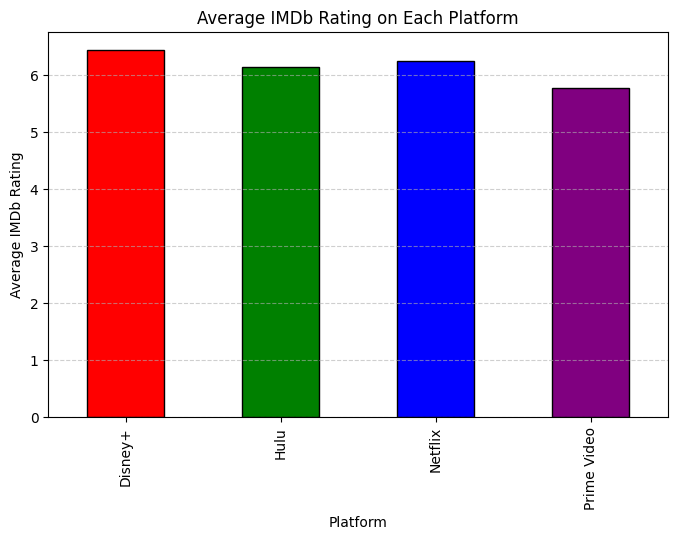

In [ ]:
df_avg_imdb = Platforms_df.groupby("Platform")["IMDb"].mean()

plt.figure(figsize=(8,5))
df_avg_imdb.plot(kind='bar', color=['red', 'green', 'blue', 'purple'], edgecolor='black')

plt.xlabel("Platform")
plt.ylabel("Average IMDb Rating")
plt.title("Average IMDb Rating on Each Platform")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()



8.get the average tomatoes rating in each platform

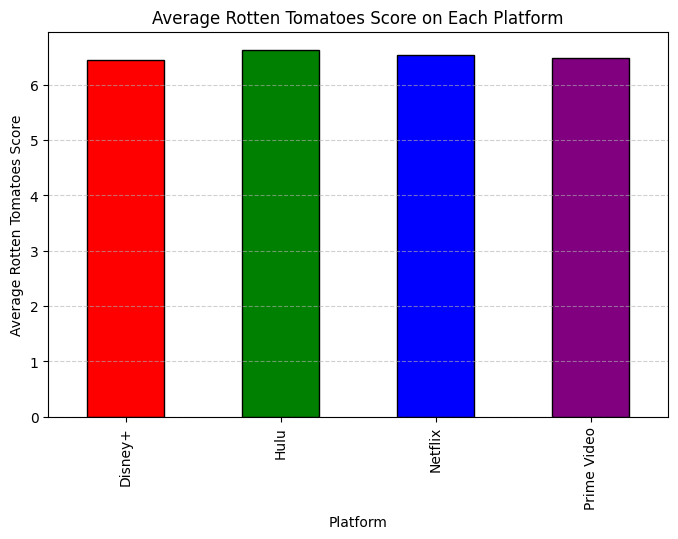

In [ ]:
df_avg_tomatoes = Platforms_df.groupby("Platform")["Rotten Tomatoes"].mean()

plt.figure(figsize=(8,5))
df_avg_tomatoes.plot(kind='bar', color=['red', 'green', 'blue', 'purple'], edgecolor='black')

plt.xlabel("Platform")
plt.ylabel("Average Rotten Tomatoes Score")
plt.title("Average Rotten Tomatoes Score on Each Platform")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


# 9.find the oulir in  imdb rating 

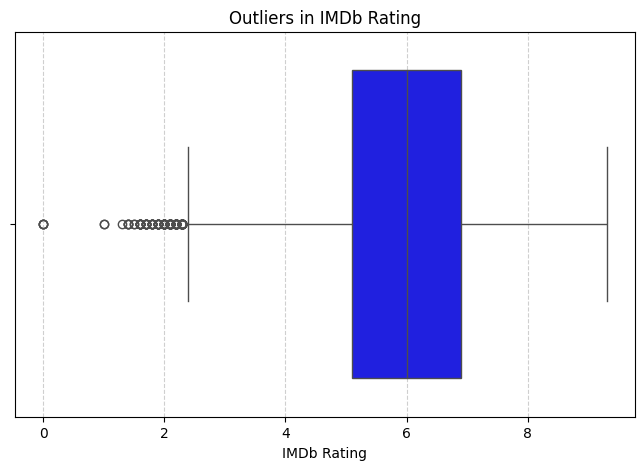

In [ ]:


plt.figure(figsize=(8,5))
sns.boxplot(x=Platforms_df["IMDb"], color="blue")

plt.xlabel("IMDb Rating")
plt.title("Outliers in IMDb Rating")
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


# 11.find the outlier in runtime  

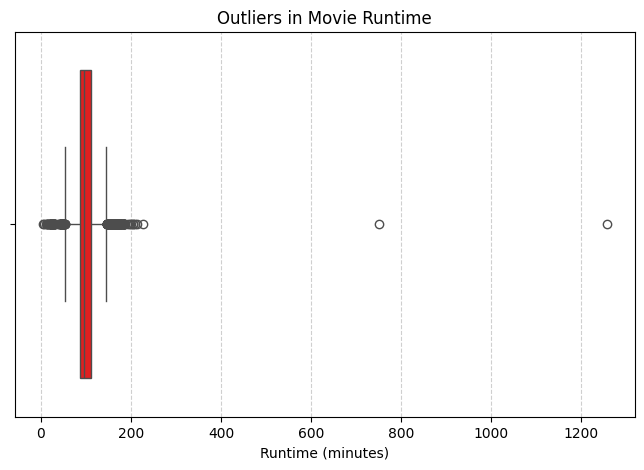

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Runtime"], color="red")

plt.xlabel("Runtime (minutes)")
plt.title("Outliers in Movie Runtime")
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


# 10. find the average runtime in each platform


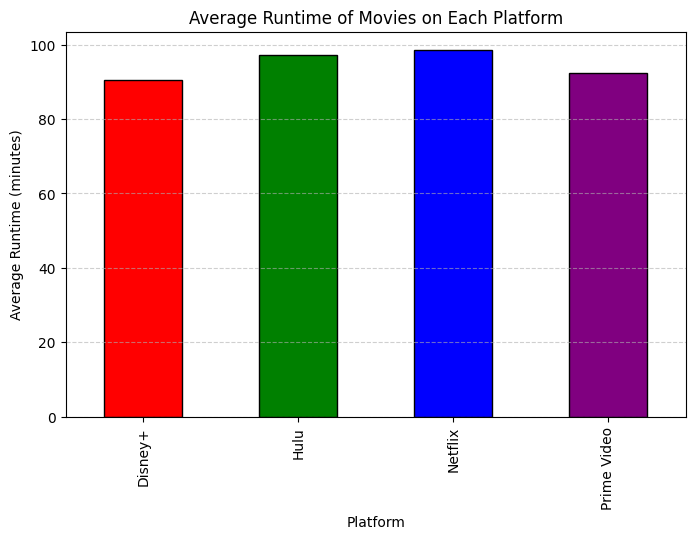

In [ ]:
df_avg_runtime = Platforms_df.groupby("Platform")["Runtime"].mean()

plt.figure(figsize=(8,5))
df_avg_runtime.plot(kind='bar', color=['red', 'green', 'blue', 'purple'], edgecolor='black')

plt.xlabel("Platform")
plt.ylabel("Average Runtime (minutes)")
plt.title("Average Runtime of Movies on Each Platform")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()



In [ ]:
z = movie.columns[[6,7,8,9]]
movie['total_plts'] = movie[z].sum(1)

a= movie['IMDb'].unique()
a.sort()
top_IMDb= a[-6:-1]



In [ ]:
top5_df = movie[movie['IMDb'].isin(top_IMDb)][['Title','Rotten Tomatoes','Genres','Runtime','total_plts']]
top5_df

,Title,Rotten Tomatoes,Genres,Runtime,total_plts
0,Inception,8.7,"Action,Adventure,Sci-Fi,Thriller",148.000000,1
1,The Matrix,8.7,"Action,Sci-Fi",136.000000,1
4,"The Good, the Bad and the Ugly",9.7,Western,161.000000,2
947,Natsamrat,6.5,"Drama,Family",166.000000,1
1214,Bill Hicks: Relentless,6.5,"Documentary,Comedy",61.000000,1
1311,Eh Janam Tumhare Lekhe,6.5,Biography,135.000000,1
1458,Untamed Romania,6.5,Documentary,92.000000,2
1979,One Heart: The A.R. Rahman Concert Film,6.5,"Documentary,Music",87.000000,1
3560,The Dark Knight,9.4,"Action,Crime,Drama,Thriller",152.000000,1
3561,GoodFellas,9.6,"Biography,Crime,Drama",146.000000,1
